In [1]:
from imutils import contours

import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
ref = cv2.imread("/media/ave/ae722e82-1476-4374-acd8-a8a18ef8ae7a/Rana_vids/ref_digits.png")

In [3]:
def get_thresh(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    final = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    return final

In [22]:
def get_contours(thresh, threshold_area=2000):
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
                                cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if imutils.is_cv2() else cnts[1]
    cnts = contours.sort_contours(cnts, method="left-to-right")[0]
    
    final_contours = []
    # Filter contours
    for cnt in cnts:
        area = cv2.contourArea(cnt)
        if area > threshold_area:
            final_contours.append(cnt)
            
    return final_contours

In [5]:
def show_contours(img):
    img = imutils.resize(img, height=150)
    final = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.threshold(gray, 0, 255,
                            cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    ref_cnts = get_contours(img)
    
    for c in ref_cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(final, (x, y), (x + w, y + h), (0, 255, 0), 5)
    
    plt.imshow(final, cmap='gray')
    plt.show()

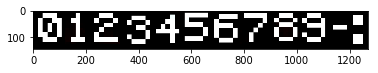

In [6]:
plt.imshow(ref, cmap='gray')
plt.show()

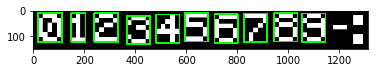

In [7]:
show_contours(ref)

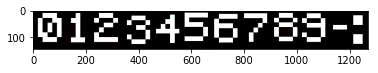

In [8]:
gaussian_blur = cv2.GaussianBlur(ref, (5, 5), 0)
plt.imshow(gaussian_blur, cmap='gray')
plt.show()

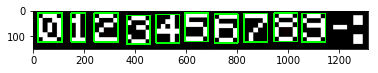

In [9]:
show_contours(gaussian_blur)

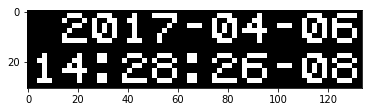

In [10]:
ts_area = cv2.imread("/home/ave/PycharmProjects/beecam/object_tracking/ts_area.png")
plt.imshow(ts_area, cmap='gray')
plt.show()

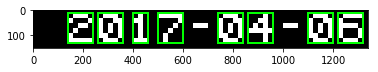

In [11]:
(h, w) = ts_area.shape[:2]
first_line = ts_area[:int(h/2), :w]
show_contours(first_line)

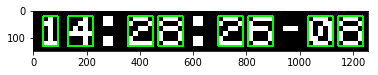

In [12]:
second_line = ts_area[int(h/2):, :w]
show_contours(second_line)

In [13]:
def define_reference_digits(ref_cnts):
    digits = {}
    # Loop over the OCR reference contours
    for (i, c) in enumerate(ref_cnts):
        # compute the bounding box for the digit, extract it, and resize
        # it to a fixed size
        (x, y, w, h) = cv2.boundingRect(c)
        roi = ref[y:y + h, x:x + w]
        roi = cv2.resize(roi, (57, 88))

        # update the digits dictionary, mapping the digit name to the ROI
        digits[i] = roi
        
    return digits

In [14]:
def classify_digits(img, reference_digits):
    img = imutils.resize(img, height=150)
    img_thresh = get_thresh(img)
    img_cnts = get_contours(img_thresh)
    
    output = []
    for c in img_cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        roi = img[y:y + h, x:x + w]
        roi = cv2.resize(roi, (57, 88))

        # Initialize a list of template matching scores
        scores = []

        # Loop over the reference digit name and digit ROI
        for (digit, digitROI) in reference_digits.items():
            # Apply correlation-based template matching, take the
            # score, and update the scores list
            result = cv2.matchTemplate(roi, digitROI,
                                       cv2.TM_CCOEFF)
            (_, score, _, _) = cv2.minMaxLoc(result)
            scores.append(score)

        # The classification for the digit ROI will be the reference
        # digit name with the largest template matching score
        max_score = str(np.argmax(scores))
        output.append((max_score, roi))

    fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(9, 4.5),
                        subplot_kw={'xticks': [], 'yticks': []})
    for ax, output in zip(axes.flat, output):
        ax.imshow(output[1])
        ax.set_title(output[0])

    plt.show()

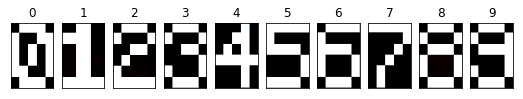

In [15]:
img = get_thresh(ref)
reference_contours = get_contours(img)
reference_digits = define_reference_digits(reference_contours)

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(9, 4.5),
                        subplot_kw={'xticks': [], 'yticks': []})
for ax, digit in zip(axes.flat, reference_digits.items()):
    ax.imshow(digit[1])
    ax.set_title(digit[0])
    
plt.show()

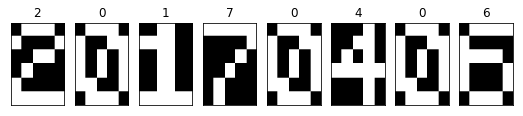

In [16]:
classify_digits(first_line, reference_digits)

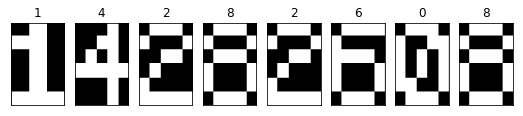

In [17]:
classify_digits(second_line, reference_digits)

In [18]:
print(reference_digits[1])

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


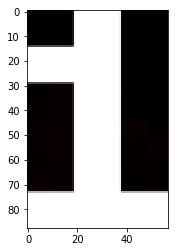

In [19]:
plt.imshow(reference_digits[1])